# Prework

Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

Chargeons le dataframe

In [3]:
data = pd.read_csv('../raw_data/data_full.csv')

In [4]:
data[['lower', 'upper']] = data['owners'].str.split('-', expand = True)
data['lower'] = data['lower'].astype('int')
data['upper'] = data['upper'].astype('int')

In [5]:
data = data[data['lower'] < 20001]

In [6]:
data.owners.value_counts()

0-20000        18530
20000-50000     3018
Name: owners, dtype: int64

In [7]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(f'"{key}"')

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"required_age"
"categories"
"genres"
"steamspy_tags"
"achievements"
"positive_ratings"
"negative_ratings"
"average_playtime"
"median_playtime"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"movies"
"pc_requirements"
"mac_requirements"
"linux_requirements"
"minimum"
"recommended"
"website"
"support_url"
"support_email"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchm

# Retrait des colonnes non pertinentes

Les colonnes de requirements sont abandonnées car peu pertinantes dans l'analyse du prix et des owners.

In [8]:
data.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum', 'recommended'], inplace=True)

De même les colonnes de support sont peu pertinantes pour nous.

In [9]:
data.drop(columns=['support_email', 'support_url'], inplace=True)

La colonne "movies" serait un peu trop complexe à analyser pour le moment, puisque qu'elle comprend des vidéos, et est très incomplète. 

In [10]:
data.drop(columns=['movies'], inplace=True)

La colonne "age" semble très incomplète. C'est pourquoi nous ne la prendront pas en compte.

In [11]:
data['required_age'].value_counts()

0     21279
18      129
16       75
12       45
7        10
3        10
Name: required_age, dtype: int64

In [12]:
data.drop(columns=['required_age'], inplace=True)

# Work date_time (& list nullvalue), (is_a_remake, sells_per_days, days_on_steam)

Il n'y a presque plus de valeurs manquantes et/ou nulles. (à l'exception de la colonne 'website')

In [13]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

steam_appid , 0
name , 0
release_date , 0
english , 0
developer , 0
publisher , 0
platforms , 0
categories , 0
genres , 0
steamspy_tags , 0
achievements , 0
positive_ratings , 0
negative_ratings , 0
average_playtime , 0
median_playtime , 0
owners , 0
price , 0
detailed_description , 0
about_the_game , 0
short_description , 0
header_image , 0
screenshots , 0
background , 0
website , 7967
1980s , 0
1990s , 0
2.5d , 0
2d , 0
2d_fighter , 0
360_video , 0
3d , 0
3d_platformer , 0
3d_vision , 0
4_player_local , 0
4x , 0
6dof , 0
atv , 0
abstract , 0
action , 0
action_rpg , 0
action_adventure , 0
addictive , 0
adventure , 0
agriculture , 0
aliens , 0
alternate_history , 0
america , 0
animation_&_modeling , 0
anime , 0
arcade , 0
arena_shooter , 0
artificial_intelligence , 0
assassin , 0
asynchronous_multiplayer , 0
atmospheric , 0
audio_production , 0
bmx , 0
base_building , 0
baseball , 0
based_on_a_novel , 0
basketball , 0
batman , 0
battle_royale , 0
beat_em_up , 0
beautiful , 0
benchmark 

Transformons la colonne 'release_date' en datetime

In [14]:
data['release_date'] = data['release_date'].astype('datetime64')

In [15]:
data['jul1'] = pd.DatetimeIndex(data['release_date']).to_julian_date()

In [16]:
data['jul1'].sort_values()

20       2453655.5
56       2453971.5
78       2454033.5
54       2454034.5
84       2454046.5
           ...    
16141    2458598.5
26488    2458598.5
25760    2458598.5
24226    2458599.5
23525    2458604.5
Name: jul1, Length: 21548, dtype: float64

In [17]:
data['days_on_steam'] = abs(data['jul1'] - 2458604.50000)

In [18]:
data['days_on_steam'].sort_values().tail(500)

1837    1860.0
2446    1860.0
2152    1861.0
2402    1861.0
2403    1861.0
2564    1861.0
2408    1861.0
2407    1861.0
2405    1861.0
2406    1861.0
2271    1861.0
2190    1862.0
2461    1863.0
2517    1863.0
2254    1864.0
1843    1867.0
2565    1867.0
2545    1867.0
2240    1868.0
2512    1868.0
2389    1868.0
2488    1869.0
2491    1870.0
2506    1870.0
2504    1870.0
2200    1871.0
2289    1871.0
2660    1874.0
2659    1874.0
2508    1875.0
2510    1875.0
2410    1875.0
2622    1876.0
2124    1876.0
1819    1877.0
2350    1877.0
2288    1877.0
2291    1878.0
2623    1878.0
1954    1881.0
2065    1881.0
2417    1882.0
1622    1882.0
2091    1883.0
2354    1883.0
2437    1884.0
1985    1884.0
2187    1888.0
2046    1888.0
2068    1888.0
2428    1889.0
2051    1890.0
2185    1890.0
1569    1891.0
2459    1891.0
2360    1891.0
2251    1892.0
2136    1892.0
2018    1895.0
1723    1895.0
2427    1896.0
2343    1897.0
2453    1897.0
2371    1898.0
2400    1898.0
2399    1898.0
2039    18

In [19]:
data = data.drop(data[data['days_on_steam'] < 30].index)

In [20]:
data['is_a_remake'] = data['jul1'] - 2452894.50000

In [21]:
def is_a_remake(value):
    if value < 0:
        return 0
    else:
        return 1

In [22]:
data['is_a_remake'] = data['is_a_remake'].apply(is_a_remake)

# Observations des min/max

Observons les valeurs des prix

In [23]:
data.sort_values(by = 'price', ascending = False).head()[['price', 'name']]

,price,name
20909,421.99,ADR-Labelling Game
12882,303.99,GameMaker Studio 2 UWP
9861,209.99,Houdini Indie
14733,154.99,CrisisActionVR
16939,154.99,Tactics 2: War


le jeux le plus cher semble être une valeur erronée, retirons la ligne.

In [24]:
data = data.drop(index=20909)

In [25]:
data.dtypes

steam_appid                                   int64
name                                         object
release_date                         datetime64[ns]
english                                       int64
developer                                    object
publisher                                    object
platforms                                    object
categories                                   object
genres                                       object
steamspy_tags                                object
achievements                                  int64
positive_ratings                              int64
negative_ratings                              int64
average_playtime                              int64
median_playtime                               int64
owners                                       object
price                                       float64
detailed_description                         object
about_the_game                               object
short_descri

# Création de nouvelles features (owner median/min/max, has a website, nb_review)

Create a column "has_a_website"

In [26]:
data.website = data['website'].fillna(0)

In [27]:
condition = lambda x: 1 if x != 0 else 0

In [28]:
data['has_a_website'] = data.website.apply(condition)

Création d'une colonne nombre total de review

In [29]:
data['nb_review'] = data['positive_ratings'] + data['negative_ratings']

# Création nouvelles features (création owner_estimated, revenu)

Création d'une colonne "1" pour traquer le nombre de jeux

In [30]:
data['1'] = 1

# Création indice publisher

Création notation publisher

In [31]:
test = data.groupby(by=['publisher'], axis=0, as_index=False).sum()

In [32]:
test['nb_game_by_publisher'] = test['1']

In [33]:
test2 = test[['publisher', 'nb_game_by_publisher']]

In [34]:
data = data.merge(test2, on='publisher')

In [35]:
test = data.groupby(by=['developer'], axis=0, as_index=False).sum()

In [36]:
test['nb_game_by_dev'] = test['1']

In [37]:
test2 = test[['developer', 'nb_game_by_dev']]

In [38]:
data = data.merge(test2, on='developer')

In [39]:
test_nathan = pd.read_csv("../raw_data/df_with_score.csv")

In [40]:
test_nathan2 = test_nathan[['score_descriptif', 'steam_appid']]

In [41]:
data = data.merge(test_nathan2, on='steam_appid')

In [42]:
data['ratio'] = data['positive_ratings'] / data['nb_review']

In [43]:
data = data[data['nb_game_by_publisher'] < 5]

In [44]:
data.sort_values(by='nb_game_by_publisher')

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,walking_simulator,war,wargame,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,lower,upper,jul1,days_on_steam,is_a_remake,has_a_website,nb_review,1,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio
0,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99,Featuring a wide collection of single and mult...,Featuring a wide collection of single and mult...,Featuring a wide collection of single and mult...,https://steamcdn-a.akamaihd.net/steam/apps/100...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/100...,http://www.ragdollkungfu.com/,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,50000,2453655.5,4949.0,1,1,57,1,1,1,9,0.701754
14880,709520,WHERE'S PHANTOM THIEF,2017-10-30,1,FlatCircle,FlatCircle,windows;mac,Single-player,Action;Casual;Indie,Action;Indie;Casual,0,2,0,0,0,0-20000,5.59,This game aimed at game play like an old Sega ...,This game aimed at game play like an old Sega ...,Your job is to find the Phantom Thief who is h...,https://steamcdn-a.akamaihd.net/steam/apps/709...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/709...,https://flatcirclegames.wixsite.com/home,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2458056.5,548.0,1,1,2,1,1,1,3,1.000000
14881,709550,Tic Tac Toe LOUNGE,2017-10-04,1,piximo interactive,piximo interactive,windows,Single-player;Local Multi-Player,Casual;Indie;Strategy,Strategy;Indie;Casual,3,3,0,0,0,0-20000,0.79,"<h2 class=""bb_tag""><strong>Enter Tic Tac Toe L...","<h2 class=""bb_tag""><strong>Enter Tic Tac Toe L...","The coolest, most entertaining and smartest ve...",https://steamcdn-a.akamaihd.net/steam/apps/709...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/709...,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2458030.5,574.0,1,0,3,1,1,1,1,1.000000
14882,709560,Until the last,2017-09-11,1,Viron Shake,Viron Shake,windows,Single-player;Steam Achievements,Indie,Indie;Horror,4,11,5,0,0,0-20000,1.59,&quot;Until the last&quot; - this is first-per...,&quot;Until the last&quot; - this is first-per...,Horror with elements of detective...,https://steamcdn-a.akamaihd.net/steam/apps/709...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/709...,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2458007.5,597.0,1,0,16,1,1,1,2,0.687500
14883,709670,Clarent Saga: Tactics,2017-09-25,1,David Nguyen,David Nguyen,windows,Single-player;Full controller support,Indie;RPG;Strategy,Strategy;RPG;Indie,0,19,1,0,0,0-20000,2.09,A straightforward Srpg Made With Srpg Studio.<...,A straightforward Srpg Made With Srpg Studio.<...,Clarent Saga: Tactics is a TRPG inspired by cl...,https://steamcdn-a.akamaihd.net/steam/apps/709...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/709...,http://crimsonswordsaga.blogspot.fr/,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2458021.5,583.0,1,1,20,1,1,1,5,0.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,764470,Gear Path,2017-12-20,1,GooDCrafter,GooDCrafter,windows;mac;linux,Single-player;Steam Achievements;Steam Cloud,Action;Adventure;Indie,Action;Adventure;Indie,5,11,3,0,0,0-20000,0.79,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",Gear Path is a small platformer Metroidvania-l...,https://steam

In [45]:
data.shape

(15052, 407)

# Tri

[array([7., 1.]), array([ 58., 134.])]

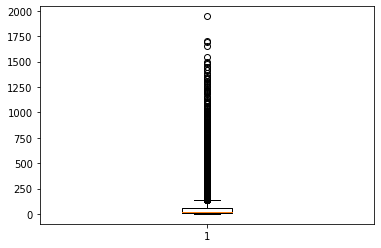

In [46]:
B = plt.boxplot(data.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [47]:
data = data[data['nb_review']< 134]

In [48]:
data2 = pd.read_csv('../raw_data/full_followers.csv')

In [49]:
data2 = data2.rename(columns={'steam_id': 'steam_appid'})

In [50]:
data = data.merge(data2,  on='steam_appid', how='inner')

[array([58.,  0.]), array([404., 923.])]

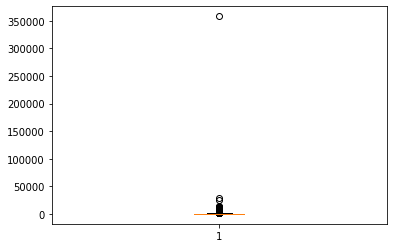

In [51]:
B = plt.boxplot(data.followers)
[item.get_ydata() for item in B['whiskers']]

In [52]:
data = data[data['followers']< 923]

In [53]:
data = data[data['days_on_steam']< 2000]

In [54]:
data = data[data['price']< 50]

In [55]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,war,wargame,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,lower,upper,jul1,days_on_steam,is_a_remake,has_a_website,nb_review,1,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,followers
1,332260,Disney•Pixar Cars Mater-National Championship,2015-02-24,1,Rainbow Studios,THQ;Disney Interactive,windows,Single-player;Shared/Split Screen;Partial Cont...,Racing,Racing;Open World;Adventure,0,51,9,0,0,0-20000,15.49,Mater is holding a national race festival allo...,Mater is holding a national race festival allo...,Mater is holding a national race festival allo...,https://steamcdn-a.akamaihd.net/steam/apps/332...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/332...,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2457077.5,1527.0,1,0,60,1,3,3,6,0.850000,627
2,781240,Mystical,2018-02-08,1,Infogrames,Piko Interactive,windows,Single-player;Local Multi-Player;Co-op,Action,Action,0,1,6,0,0,0-20000,3.99,You are a novice magician at the end of his st...,You are a novice magician at the end of his st...,You are a novice magician at the end of his st...,https://steamcdn-a.akamaihd.net/steam/apps/781...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/781...,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2458157.5,447.0,1,0,7,1,2,13,1,0.142857,56
4,261350,Steam Bandits: Outpost,2014-01-14,1,Iocaine Studios,Iocaine Studios,windows;mac;linux,Single-player;Cross-Platform Multiplayer;Steam...,Adventure;Casual;Indie;RPG;Early Access,Early Access;RPG;Adventure,0,35,29,0,0,0-20000,15.49,<h1>READ BEFORE BUYING</h1><p><strong>Before b...,<strong>** This game requires a constant inter...,Explore the skies of a Steampunk world while d...,https://steamcdn-a.akamaihd.net/steam/apps/261...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/261...,http://www.SteamBanditsOutpost.com,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2456671.5,1933.0,1,1,64,1,1,2,10,0.546875,393
7,321940,Moorhuhn: Tiger and Chicken,2014-09-24,1,Deck 13,Young Fun Studio by Higgs Games GmbH,windows,Single-player;Local Multi-Player;Shared/Split ...,Action;Indie;RPG,Action;RPG;Indie,0,22,9,0,0,0-20000,3.99,The Crazy Chicken first saw the light of day 1...,The Crazy Chicken first saw the light of day 1...,"For the first time ever, Crazy Chicken in a ma...",https://steamcdn-a.akamaihd.net/steam/apps/321...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/321...,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2456924.5,1680.0,1,0,31,1,2,4,4,0.709677,400
8,492530,The Dark Legions,2016-07-09,1,Mascot Entertainment,Mascot Entertainment,windows,Single-player;Steam Trading Cards,Indie;Strategy,Indie;Strategy;Medieval,0,45,14,0,0,0-20000,1.59,"<h2 class=""bb_tag"">Overview</h2>The Dark Legio...","<h2 class=""bb_tag"">Overview</h2>The Dark Legio...",The Dark Legions is a 3d real-time strategy ga...,https://steamcdn-a.akamaihd.net/steam/apps/492...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/492...,http://www.mascot.hu/games/tdl/index.html,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,20000,2457578.5,1026.0,1,1,59,1,1,2,6,0.762712,663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,1048410,Becoming a Dandelion Spore,2019-03-31,1,nemoBUS,nemoBUS,windows,Single-player,Indie,Indie,0,0,2,0,0,0-20000,2.09,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-

In [56]:
data = data[["steam_appid",
"name",
"developer",
"publisher",
"platforms",
"english",
"price",
"days_on_steam",
"is_a_remake",
"has_a_website",
"score_descriptif",
"ratio",
"nb_review",
"nb_game_by_publisher",
"nb_game_by_dev",
 "followers"
]]

In [57]:
data = data[data['nb_game_by_dev']< 5]

In [58]:
data

,steam_appid,name,developer,publisher,platforms,english,price,days_on_steam,is_a_remake,has_a_website,score_descriptif,ratio,nb_review,nb_game_by_publisher,nb_game_by_dev,followers
1,332260,Disney•Pixar Cars Mater-National Championship,Rainbow Studios,THQ;Disney Interactive,windows,1,15.49,1527.0,1,0,6,0.850000,60,3,3,627
4,261350,Steam Bandits: Outpost,Iocaine Studios,Iocaine Studios,windows;mac;linux,1,15.49,1933.0,1,1,10,0.546875,64,1,2,393
7,321940,Moorhuhn: Tiger and Chicken,Deck 13,Young Fun Studio by Higgs Games GmbH,windows,1,3.99,1680.0,1,0,4,0.709677,31,2,4,400
8,492530,The Dark Legions,Mascot Entertainment,Mascot Entertainment,windows,1,1.59,1026.0,1,1,6,0.762712,59,1,2,663
12,500790,Moribund,Traptics,Traptics,windows;mac;linux,1,7.99,776.0,1,1,7,0.947368,19,1,2,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,1048410,Becoming a Dandelion Spore,nemoBUS,nemoBUS,windows,1,2.09,31.0,1,1,2,0.000000,2,1,1,33
13190,1048470,迷雾 The Mist,LeeroyLin,LeeroyLin,windows,1,2.09,34.0,1,0,2,0.833333,6,1,1,40
13191,1048640,At Home,BisquitPlay,BisquitPlay,windows,1,3.99,35.0,1,0,4,0.250000,12,1,1,105
13192,1049230,Gray Memory,Sole,Sole,windows,1,2.09,34.0,1,0,4,0.500000,2,1,1,9


# Target

In [59]:
alpha = 50000/133

In [60]:
data['owner_estimated'] = round(alpha*data.nb_review)

In [61]:
data

,steam_appid,name,developer,publisher,platforms,english,price,days_on_steam,is_a_remake,has_a_website,score_descriptif,ratio,nb_review,nb_game_by_publisher,nb_game_by_dev,followers,owner_estimated
1,332260,Disney•Pixar Cars Mater-National Championship,Rainbow Studios,THQ;Disney Interactive,windows,1,15.49,1527.0,1,0,6,0.850000,60,3,3,627,22556.0
4,261350,Steam Bandits: Outpost,Iocaine Studios,Iocaine Studios,windows;mac;linux,1,15.49,1933.0,1,1,10,0.546875,64,1,2,393,24060.0
7,321940,Moorhuhn: Tiger and Chicken,Deck 13,Young Fun Studio by Higgs Games GmbH,windows,1,3.99,1680.0,1,0,4,0.709677,31,2,4,400,11654.0
8,492530,The Dark Legions,Mascot Entertainment,Mascot Entertainment,windows,1,1.59,1026.0,1,1,6,0.762712,59,1,2,663,22180.0
12,500790,Moribund,Traptics,Traptics,windows;mac;linux,1,7.99,776.0,1,1,7,0.947368,19,1,2,306,7143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,1048410,Becoming a Dandelion Spore,nemoBUS,nemoBUS,windows,1,2.09,31.0,1,1,2,0.000000,2,1,1,33,752.0
13190,1048470,迷雾 The Mist,LeeroyLin,LeeroyLin,windows,1,2.09,34.0,1,0,2,0.833333,6,1,1,40,2256.0
13191,1048640,At Home,BisquitPlay,BisquitPlay,windows,1,3.99,35.0,1,0,4,0.250000,12,1,1,105,4511.0
13192,1049230,Gray Memory,Sole,Sole,windows,1,2.09,34.0,1,0,4,0.500000,2,1,1,9,752.0


# Création du dataset final (merge travail nlp, selection des colonnes, pondération)

In [62]:
data__ = pd.read_csv('../raw_data/df_with_20_topics.csv')

In [63]:
data_final = data__.merge(data,  on='steam_appid', how='inner')

In [64]:
data_final

,steam_appid,name_x,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,name_y,developer,publisher,platforms,english,price,days_on_steam,is_a_remake,has_a_website,score_descriptif,ratio,nb_review,nb_game_by_publisher,nb_game_by_dev,followers,owner_estimated
0,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,Land It!,Nemesys Games,Nemesys Games,windows;mac,1,6.99,1003.0,1,0,2,0.909091,11,1,1,138,4135.0
1,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,BIT.TRIP FLUX,Gaijin Games,Gaijin Games,windows;mac,1,6.99,1791.0,1,1,5,0.533835,133,3,3,166,50000.0
2,222180,Mushroom Men: Truffle Trouble,action platformer puzzle_platformer puzzle 3d_...,0.448947,0.016124,0.260814,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,Mushroom Men: Truffle Trouble,Red Fly Studio,Red Fly Studio,windows,1,1.99,1513.0,1,0,7,0.700000,30,2,1,376,11278.0
3,222500,Rail Adventures - VR Tech Demo,free_to_play action racing vr puzzle_platformer,0.466452,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.247480,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,Rail Adventures - VR Tech Demo,exosyphen studios,exosyphen studios,windows,1,0.00,979.0,1,1,4,0.484848,33,4,4,324,12406.0
4,229560,Hacker Evolution IMMERSION,simulation early_access action hacking relaxing,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.678023,0.016946,Hacker Evolution IMMERSION,exosyphen studios,exosyphen studios,windows;mac;linux,1,14.99,1006.0,1,1,3,0.578947,38,4,4,0,14286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11459,1048640,At Home,adventure action stealth replay_value psycholo...,0.223394,0.016550,0.016550,0.016550,0.260176,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.235076,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,At Home,BisquitPlay,BisquitPlay,windows,1,3.99,35.0,1,0,4,0.250000,12,1,1,105,4511.0
11460,1049230,Gray Memory,adventure 1980s relaxing realistic real_time_w...,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.704628,Gray Memory,Sole,Sole,windows,1,2.09,34.0,1,0,4,0.500000,2,1,1,9,752.0
11461,1049840,Haramatia,rpg early_access action adventure massively_mu...,0.016079,0.016079,0.016079,0.016079,0.016079,0.418829,0.016079,0.016079,0.016079,0.291743,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,Haramatia,Salavat Kasimov,Sevite byte studio,windows,1,2.79,35.0,1,0,2,0.500000,2,1,1,131,752.0
11462,1049930,Frank and 10 roots,3d_platformer difficult platformer singleplaye...,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.700849,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,Frank and 10 roots,Horrendous Games,Horrendous Games,windows,1,2.89,32.0,1,1,1,1.000000,1,2,2,18,376.0


In [65]:
#data_ponderation = pd.read_csv('../raw_data/data_ponderation.csv')

In [66]:
#data_final = data_final.merge(data_ponderation,  on='steam_appid')

In [67]:
data_final

,steam_appid,name_x,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,name_y,developer,publisher,platforms,english,price,days_on_steam,is_a_remake,has_a_website,score_descriptif,ratio,nb_review,nb_game_by_publisher,nb_game_by_dev,followers,owner_estimated
0,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,Land It!,Nemesys Games,Nemesys Games,windows;mac,1,6.99,1003.0,1,0,2,0.909091,11,1,1,138,4135.0
1,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,BIT.TRIP FLUX,Gaijin Games,Gaijin Games,windows;mac,1,6.99,1791.0,1,1,5,0.533835,133,3,3,166,50000.0
2,222180,Mushroom Men: Truffle Trouble,action platformer puzzle_platformer puzzle 3d_...,0.448947,0.016124,0.260814,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,0.016124,Mushroom Men: Truffle Trouble,Red Fly Studio,Red Fly Studio,windows,1,1.99,1513.0,1,0,7,0.700000,30,2,1,376,11278.0
3,222500,Rail Adventures - VR Tech Demo,free_to_play action racing vr puzzle_platformer,0.466452,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.247480,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,0.015893,Rail Adventures - VR Tech Demo,exosyphen studios,exosyphen studios,windows,1,0.00,979.0,1,1,4,0.484848,33,4,4,324,12406.0
4,229560,Hacker Evolution IMMERSION,simulation early_access action hacking relaxing,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.016946,0.678023,0.016946,Hacker Evolution IMMERSION,exosyphen studios,exosyphen studios,windows;mac;linux,1,14.99,1006.0,1,1,3,0.578947,38,4,4,0,14286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11459,1048640,At Home,adventure action stealth replay_value psycholo...,0.223394,0.016550,0.016550,0.016550,0.260176,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,0.235076,0.016550,0.016550,0.016550,0.016550,0.016550,0.016550,At Home,BisquitPlay,BisquitPlay,windows,1,3.99,35.0,1,0,4,0.250000,12,1,1,105,4511.0
11460,1049230,Gray Memory,adventure 1980s relaxing realistic real_time_w...,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.704628,Gray Memory,Sole,Sole,windows,1,2.09,34.0,1,0,4,0.500000,2,1,1,9,752.0
11461,1049840,Haramatia,rpg early_access action adventure massively_mu...,0.016079,0.016079,0.016079,0.016079,0.016079,0.418829,0.016079,0.016079,0.016079,0.291743,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,0.016079,Haramatia,Salavat Kasimov,Sevite byte studio,windows,1,2.79,35.0,1,0,2,0.500000,2,1,1,131,752.0
11462,1049930,Frank and 10 roots,3d_platformer difficult platformer singleplaye...,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,0.700849,0.015745,0.015745,0.015745,0.015745,0.015745,0.015745,Frank and 10 roots,Horrendous Games,Horrendous Games,windows,1,2.89,32.0,1,1,1,1.000000,1,2,2,18,376.0


# Enregistrement du dataset final

In [68]:
data_final.to_csv(r'data_final_indé_medium2.csv', index = False)